In [1]:
import numpy as np
import sklearn
from sklearn import datasets
import matplotlib.pyplot as plt

In [2]:
def sigmoid(x):
    return 1/float((1+np.exp(-x)))

In [3]:
def sigmoidd(x):
    sig=[]
    for row in x:
        r=[]
        for value in row:
            r.append(sigmoid(value))
        sig.append(r)
    return sig

In [4]:
def diff_sigmoid(x):
    return sigmoid(x)*(1-sigmoid(x))

In [5]:
def diff_sigmoidd(x):
    sig=[]
    for row in x:
        r=[]
        for value in row:
            r.append(diff_sigmoid(value))
        sig.append(r)
    return sig

In [6]:
x=np.array([[1,0],[1,1],[0,1]])
y=np.array([[1],[0],[1]])

#x=np.array([[1,2],[2,3],[3,1],[6,5],[7,7],[8,6]])
#y=np.array([[0],[0],[0],[1],[1],[1]])

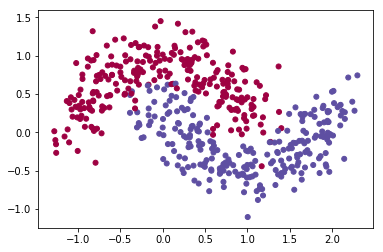

In [7]:
np.random.seed(0)
X,y=sklearn.datasets.make_moons(500, noise=0.20)
x=X
y=y
b=y
plt.scatter(X[:,0], X[:,1], s=25, c=y, cmap=plt.cm.Spectral)

In [8]:
k=[]
for v in y:
    k.append([v])
    
y=k

In [9]:
X.shape

(500, 2)

In [10]:
epoch=150
learning_rate=0.1
input_layer_neurons=x.shape[1] #no. of features in input
layer_1_neurons=20 #no.of neurons in layer1
layer_2_neurons=8 #no.of neurons in layer2
output_neurons=1  #no.of neurons in output layer

In [11]:
def initial_weight_and_bais(previous_layer_neurons,current_layer_neurons):
    weight_current_layer=np.random.uniform(size=(previous_layer_neurons,current_layer_neurons))
    bais_current_layer=np.random.uniform(size=(1,current_layer_neurons))
    
    return weight_current_layer,bais_current_layer

In [12]:
weight_layer_1,bais_layer_1=initial_weight_and_bais(input_layer_neurons,layer_1_neurons)
weight_layer_2,bais_layer_2=initial_weight_and_bais(layer_1_neurons,layer_2_neurons)
weight_output,bais_output=initial_weight_and_bais(layer_2_neurons,output_neurons)

In [13]:
for i in range(epoch):
    print(i)
    #forward propogation
    
    layer_1_input=np.dot(x,weight_layer_1)+bais_layer_1
    layer_1_activation=np.array(sigmoidd(layer_1_input))
    
    layer_2_input=np.dot(layer_1_activation,weight_layer_2)+bais_layer_2
    layer_2_activation=np.array(sigmoidd(layer_2_input))
    
    output_layer_input=np.dot(layer_2_activation,weight_output)+bais_output
    output_layer_activation=np.array(sigmoidd(output_layer_input))
    
    #backward propogation
    
    slope_output=diff_sigmoidd(output_layer_activation)
    slope_layer2=diff_sigmoidd(layer_2_activation)
    slope_layer1=diff_sigmoidd(layer_1_activation)
    
    error_output=y-output_layer_activation  #error at output
    delta_output=error_output*slope_output
    
    error_layer2=np.dot(delta_output,weight_output.T)
    delta_layer2=error_layer2*slope_layer2
    
    error_layer1=np.dot(delta_layer2,weight_layer_2.T)
    delta_layer1=error_layer1*slope_layer1
    
    weight_output+=np.dot(layer_2_activation.T,delta_output)*learning_rate
    bais_output+=np.sum(delta_output,axis=0,keepdims=True)*learning_rate
    
    weight_layer_2+=np.dot(layer_1_activation.T,delta_layer2)*learning_rate
    bais_layer_2+=np.sum(delta_layer2,axis=0,keepdims=True)*learning_rate
    
    weight_layer_1+=np.dot(x.T,delta_layer1)*learning_rate
    bais_layer_1+=np.sum(delta_layer1,axis=0,keepdims=True)*learning_rate
    


0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116


c:\program files (x86)\python36-32\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  


117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149


In [15]:
output_layer_activation

array([[0.04912126],
       [0.04912126],
       [0.70905092],
       [0.70905092],
       [0.70905092],
       [0.70905092],
       [0.70905092],
       [0.70905092],
       [0.04912126],
       [0.04912126],
       [0.04912126],
       [0.04912126],
       [0.70905092],
       [0.04912126],
       [0.04912126],
       [0.70905092],
       [0.70905092],
       [0.70905092],
       [0.04912126],
       [0.04912126],
       [0.04912126],
       [0.70905092],
       [0.04912126],
       [0.04912126],
       [0.04912126],
       [0.70905092],
       [0.70905092],
       [0.70905092],
       [0.04912126],
       [0.04912126],
       [0.70905092],
       [0.04912126],
       [0.04912126],
       [0.04912126],
       [0.70905092],
       [0.70905092],
       [0.70391538],
       [0.70905092],
       [0.70905092],
       [0.04912126],
       [0.70905092],
       [0.70905044],
       [0.70905092],
       [0.04912126],
       [0.04912126],
       [0.70905092],
       [0.04912126],
       [0.709

In [17]:
c=0
for i in range(len(y)):
    #print(y[i][0],' :: ',round(output_layer_activation[i][0]))
    if int(round(output_layer_activation[i][0]))==y[i][0]:
        c+=1
        
print(c)
print(len(y))
print(c/len(y))

415
500
0.83


[[0.8853224 ]
 [0.28015028]
 [0.28015028]
 [0.8853224 ]]


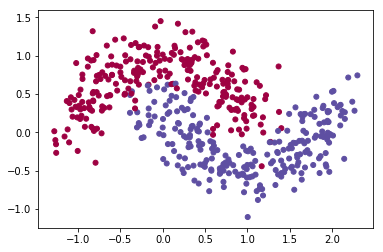

In [18]:
x_predict=[[0,0],[1,1],[0,1.5],[2,1]]

plt.scatter(X[:,0], X[:,1], s=25, c=b, cmap=plt.cm.Spectral)

layer_1_input=np.dot(x_predict,weight_layer_1)+bais_layer_1
layer_1_activation=np.array(sigmoidd(layer_1_input))
    
layer_2_input=np.dot(layer_1_activation,weight_layer_2)+bais_layer_2
layer_2_activation=np.array(sigmoidd(layer_2_input))
    
output_layer_input=np.dot(layer_2_activation,weight_output)+bais_output
output_layer_activation=np.array(sigmoidd(output_layer_input))

print(output_layer_activation)